In [ ]:
import re
import os
import copy
import pickle
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from google.colab import drive
from skimage.io import imread
from sklearn.neighbors import KNeighborsClassifier as ks

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
arr=[]
labels = []
i=0
j=0
for root,di,files in os.walk("/content/drive/MyDrive/Colab Notebooks/dataset"): 
  for name in files:
    if name.endswith("pgm"):
      root_folder = os.path.split(root)
      res=re.findall('(\d+)',root_folder[1])
      image = imread(os.path.join(root,name))
      image=image.flatten(order='C')
      arr.append(image)
      labels.append(int(res[0]))
      i=i+1
arr=np.array(arr)   
labels=np.array(labels)    

In [ ]:
print(labels.shape)       
print(arr.shape)
print(labels[2])

(400,)
(400, 10304)
6


In [ ]:
# adding the data to a dataframe
df = pd.DataFrame(arr) 
df['label'] = pd.DataFrame(labels)
# sorting the data according to labels
df.sort_values("label", inplace=True)
df.head(5)

,0,1,2,3,4,5,6,7,8,9,...,10295,10296,10297,10298,10299,10300,10301,10302,10303,label
365,43,50,41,58,78,83,67,48,44,46,...,164,164,162,159,156,155,158,153,169,1
366,41,47,47,46,44,49,48,58,61,49,...,34,35,34,36,34,39,35,37,38,1
368,44,43,32,32,30,30,38,40,48,66,...,42,42,40,33,29,37,43,43,37,1
364,63,53,35,36,33,34,31,35,39,43,...,169,166,161,158,169,137,41,10,24,1
363,39,44,53,37,61,48,61,45,35,40,...,30,36,32,28,32,31,29,26,29,1


In [ ]:
# seperating images from labels
Y = np.array(df['label'])
df = df.drop(axis=1, labels="label")

In [ ]:
df = df.reset_index()
df.head()

,index,0,1,2,3,4,5,6,7,8,...,10294,10295,10296,10297,10298,10299,10300,10301,10302,10303
0,365,43,50,41,58,78,83,67,48,44,...,167,164,164,162,159,156,155,158,153,169
1,366,41,47,47,46,44,49,48,58,61,...,27,34,35,34,36,34,39,35,37,38
2,368,44,43,32,32,30,30,38,40,48,...,37,42,42,40,33,29,37,43,43,37
3,364,63,53,35,36,33,34,31,35,39,...,173,169,166,161,158,169,137,41,10,24
4,363,39,44,53,37,61,48,61,45,35,...,23,30,36,32,28,32,31,29,26,29


In [ ]:
df = df.drop(axis=1, labels="index")
df.head()

,0,1,2,3,4,5,6,7,8,9,...,10294,10295,10296,10297,10298,10299,10300,10301,10302,10303
0,43,50,41,58,78,83,67,48,44,46,...,167,164,164,162,159,156,155,158,153,169
1,41,47,47,46,44,49,48,58,61,49,...,27,34,35,34,36,34,39,35,37,38
2,44,43,32,32,30,30,38,40,48,66,...,37,42,42,40,33,29,37,43,43,37
3,63,53,35,36,33,34,31,35,39,43,...,173,169,166,161,158,169,137,41,10,24
4,39,44,53,37,61,48,61,45,35,40,...,23,30,36,32,28,32,31,29,26,29


In [ ]:
X_train = []
X_test =  []  
labels_train = []
labels_test =  []  

for i in range(0,400):
    if((i%2==0)):
       X_test.append(arr[i,:])
       labels_test.append(labels[i])
    else:
       X_train.append(arr[i,:])
       labels_train.append(labels[i])
 
print(X_test[0])
print(labels_test[0])

[156 158 155 ... 113 110 108]
6


In [ ]:
X_train = np.array(X_train)
X_test =  np.array(X_test)
labels_train = np.array(labels_train)
labels_test =  np.array(labels_test)

In [ ]:
def PCA(X):
  # X           ---> data to be reduced
  # alpha       ---> total variance threshold
  # evectors    ---> eigen vectors used to reduce the dimensionality

  # calculate the mean
  mean = np.mean(X,axis=0)
  # center the data
  z = X - mean
  # calculate covariance matrix
  cov = (1/X.shape[0])*np.dot(z.T,z)
  # calculate eigenvalues and eigenvectors
  (evalues, evectors) = np.linalg.eigh(cov)
  evalues = np.flip(evalues)
  evectors = np.flip(evectors,axis=1)

  return (evalues, evectors)


In [ ]:
def choose_dim(evalues, evectors, alpha):
  # fraction of total variance
  fr = evalues/evalues.sum()

  totvar = 0
  i = 0

  while(totvar < alpha):
    totvar = totvar + fr[i]
    i = i + 1

  # choose dimensionality
  evectors = evectors[ : , 0:i]

  return evectors

In [ ]:
def reduce_dim(X, evectors):
  reducedmat = np.matmul(evectors.T,X.T).T
  return reducedmat

In [ ]:
# DO NOT RUN THIS CELL IF YOU ALREADY HAVE THE PICKLE FILES
(evalues, evectors) = PCA(X_train)
# DO NOT RUN THIS CELL IF YOU ALREADY HAVE THE PICKLE FILES

In [ ]:
# saving the PCA output for later use
file_name = 'PCA_evalues.pkl'
with open(file_name, 'wb') as file:
    pickle.dump(evalues, file)
    print(f'Object successfully saved to "{file_name}"')

Object successfully saved to "PCA_evalues.pkl"


In [ ]:
# saving the PCA output for later use
file_name = 'PCA_evectors.pkl'
with open(file_name, 'wb') as file:
    pickle.dump(evectors, file)
    print(f'Object successfully saved to "{file_name}"')

Object successfully saved to "PCA_evectors.pkl"


In [ ]:
file_name = 'PCA_evalues.pkl'
with open(file_name, 'rb') as file:
    evalues  = pickle.load(file)
    print(f'Object successfully loaded from "{file_name}"')

Object successfully loaded from "PCA_evalues.pkl"


In [ ]:
file_name = 'PCA_evectors.pkl'
with open(file_name, 'rb') as file:
    evectors = pickle.load(file)
    print(f'Object successfully loaded from "{file_name}"')

Object successfully loaded from "PCA_evectors.pkl"


In [ ]:
evectors_red = choose_dim(evalues, evectors, 0.8)

In [ ]:
X_train_red = reduce_dim(X_train, evectors_red)
X_test_red =  reduce_dim(X_test, evectors_red)

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(X_train_red, labels_train)

KNeighborsClassifier(n_neighbors=1)

In [ ]:
knn.score(X_test_red, labels_test)

0.945

In [ ]:
evectors_red = choose_dim(evalues, evectors, 0.85)
X_train_red = reduce_dim(X_train, evectors_red)
X_test_red =  reduce_dim(X_test, evectors_red)
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(X_train_red, labels_train)
knn.score(X_test_red, labels_test)

0.95

In [ ]:
evectors_red = choose_dim(evalues, evectors, 0.9)
X_train_red = reduce_dim(X_train, evectors_red)
X_test_red =  reduce_dim(X_test, evectors_red)
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(X_train_red, labels_train)
knn.score(X_test_red, labels_test)

0.955

In [ ]:
evectors_red = choose_dim(evalues, evectors, 0.95)
X_train_red = reduce_dim(X_train, evectors_red)
X_test_red =  reduce_dim(X_test, evectors_red)
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(X_train_red, labels_train)
knn.score(X_test_red, labels_test)


0.96

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
evectors_red = choose_dim(evalues, evectors, 0.85)
X_train_red = reduce_dim(X_train, evectors_red)
X_test_red =  reduce_dim(X_test, evectors_red)
knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(X_train_red, labels_train)
knn.score(X_test_red, labels_test)
pred = knn.predict(X_test_red)
acc1_085= accuracy_score(pred,labels_test)

knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train_red, labels_train)
knn.score(X_test_red, labels_test)
pred = knn.predict(X_test_red)
acc3_085= accuracy_score(pred,labels_test)

knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train_red, labels_train)
knn.score(X_test_red, labels_test)
pred = knn.predict(X_test_red)
acc5_085= accuracy_score(pred,labels_test)

knn = KNeighborsClassifier(n_neighbors=7)
knn.fit(X_train_red, labels_train)
knn.score(X_test_red, labels_test)
pred = knn.predict(X_test_red)
acc7_085= accuracy_score(pred,labels_test)



evectors_red = choose_dim(evalues, evectors, 0.9)
X_train_red = reduce_dim(X_train, evectors_red)
X_test_red =  reduce_dim(X_test, evectors_red)
knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(X_train_red, labels_train)
knn.score(X_test_red, labels_test)
pred = knn.predict(X_test_red)
acc1_09= accuracy_score(pred,labels_test)
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train_red, labels_train)
knn.score(X_test_red, labels_test)
pred = knn.predict(X_test_red)
acc3_09= accuracy_score(pred,labels_test)
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train_red, labels_train)
knn.score(X_test_red, labels_test)
pred = knn.predict(X_test_red)
acc5_09= accuracy_score(pred,labels_test)
knn = KNeighborsClassifier(n_neighbors=7)
knn.fit(X_train_red, labels_train)
knn.score(X_test_red, labels_test)
pred = knn.predict(X_test_red)
acc7_09= accuracy_score(pred,labels_test)
evectors_red = choose_dim(evalues, evectors, 0.95)
X_train_red = reduce_dim(X_train, evectors_red)
X_test_red =  reduce_dim(X_test, evectors_red)
knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(X_train_red, labels_train)
knn.score(X_test_red, labels_test)
pred = knn.predict(X_test_red)
acc1_095= accuracy_score(pred,labels_test)

knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train_red, labels_train)
knn.score(X_test_red, labels_test)
pred = knn.predict(X_test_red)
acc3_095= accuracy_score(pred,labels_test)
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train_red, labels_train)
knn.score(X_test_red, labels_test)
pred = knn.predict(X_test_red)
acc5_095= accuracy_score(pred,labels_test)
knn = KNeighborsClassifier(n_neighbors=7)
knn.fit(X_train_red, labels_train)
knn.score(X_test_red, labels_test)
pred = knn.predict(X_test_red)
acc7_095= accuracy_score(pred,labels_test)

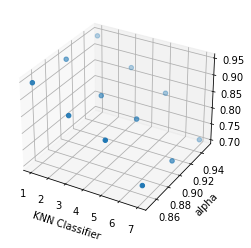

In [ ]:
from mpl_toolkits import mplot3d
import numpy as np
import matplotlib.pyplot as plt
 
fig = plt.figure()
# syntax for 3-D projection
ax = plt.axes(projection ='3d')
# defining all 3 axis
y = [0.85,0.85,0.85,0.85,0.9, 0.9, 0.9, 0.9,0.95, 0.95, 0.95, 0.95]
x = [1,3,5,7,1,3,5,7,1,3,5,7]
z = [acc1_085,acc3_085,acc5_085,acc7_085,acc1_09,acc3_09,acc5_09,acc7_09,acc1_095,acc3_095,acc5_095,acc7_095]
ax.scatter(x, y, z)
# plotting
#ax.set_title('')
plt.xlabel('KNN Classifier')
plt.ylabel('alpha')
plt.show()

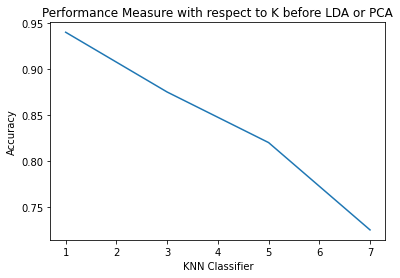

In [ ]:
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

#Before PCA
knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(X_train, labels_train)
pred = knn.predict(X_test)
acc1= accuracy_score(pred,labels_test)

knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, labels_train)
pred = knn.predict(X_test)
acc3= accuracy_score(pred,labels_test)

knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, labels_train)
pred = knn.predict(X_test)
acc5= accuracy_score(pred,labels_test)

knn = KNeighborsClassifier(n_neighbors=7)
knn.fit(X_train, labels_train)
pred = knn.predict(X_test)
acc7= accuracy_score(pred,labels_test)

x = [1,3,5,7]
# corresponding y axis values
y = [acc1,acc3,acc5,acc7]
plt.plot(x, y)
plt.xlabel('KNN Classifier')
plt.ylabel('Accuracy')
plt.title('Performance Measure with respect to K before LDA or PCA')
plt.show()

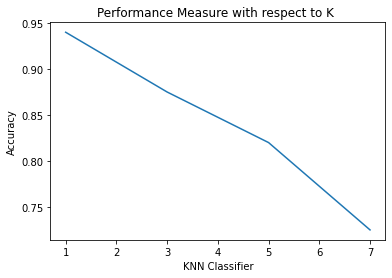

In [ ]:
x = [1,3,5,7]
# corresponding y axis values
y = [acc1,acc3,acc5,acc7]
plt.plot(x, y)
plt.xlabel('KNN Classifier')
plt.ylabel('Accuracy')
plt.title('Performance Measure with respect to K ')
plt.show()